<a href="https://colab.research.google.com/github/Long-Live-Lord-Voldemort/Long-Live-Lord-Voldemort/blob/main/Mean_Variance_Portfolio_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from scipy.optimize import minimize
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=5, suppress=True,
formatter={'float': lambda x: f'{x:6.3f}'})

In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [4]:
raw = pd.read_csv(url, index_col=0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [5]:
symbols = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GLD']

In [6]:
rets = np.log(raw[symbols] / raw[symbols].shift(1)).dropna()

**Normalized financial time series data**

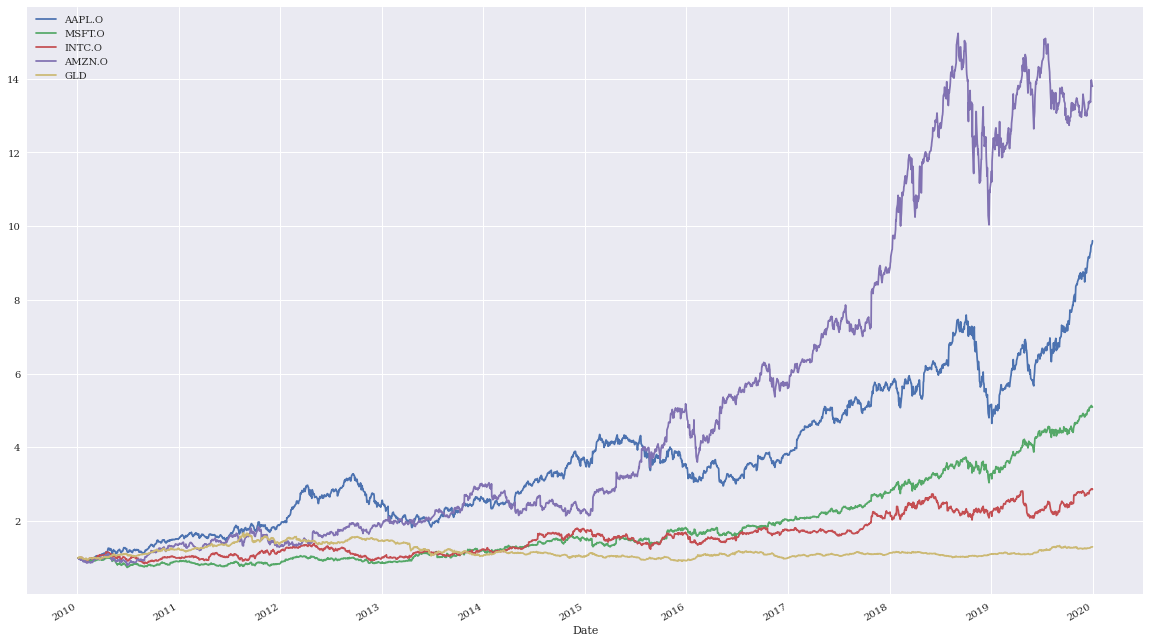

In [8]:
(raw[symbols] / raw[symbols].iloc[0]).plot(figsize=(20, 12));

In [9]:
weights = len(rets.columns) * [1 / len(rets.columns)]

In [10]:
def port_return(rets, weights):
  return np.dot(rets.mean(), weights) * 252

In [11]:
port_return(rets, weights)

0.15694764653018103

In [12]:
def port_volatility(rets, weights):
  return np.dot(weights, np.dot(rets.cov() * 252 , weights)) ** 0.5

In [13]:
port_volatility(rets, weights)

0.16106507848480675

In [14]:
def port_sharpe(rets, weights):
  return port_return(rets, weights) / port_volatility(rets, weights)

In [15]:
port_sharpe(rets, weights)

0.9744362217225497

In [16]:
w = np.random.random((1000, len(symbols)))
w = (w.T / w.sum(axis=1)).T

In [17]:
w[:5]

array([[ 0.109,  0.047,  0.317,  0.076,  0.450],
       [ 0.290,  0.040,  0.121,  0.441,  0.109],
       [ 0.022,  0.239,  0.246,  0.226,  0.267],
       [ 0.025,  0.222,  0.215,  0.295,  0.243],
       [ 0.227,  0.389,  0.068,  0.081,  0.235]])

In [18]:
pvr = [(port_volatility(rets[symbols], weights),
port_return(rets[symbols], weights))
for weights in w]
pvr = np.array(pvr)

In [19]:
psr = pvr[:, 1] / pvr[:, 0]

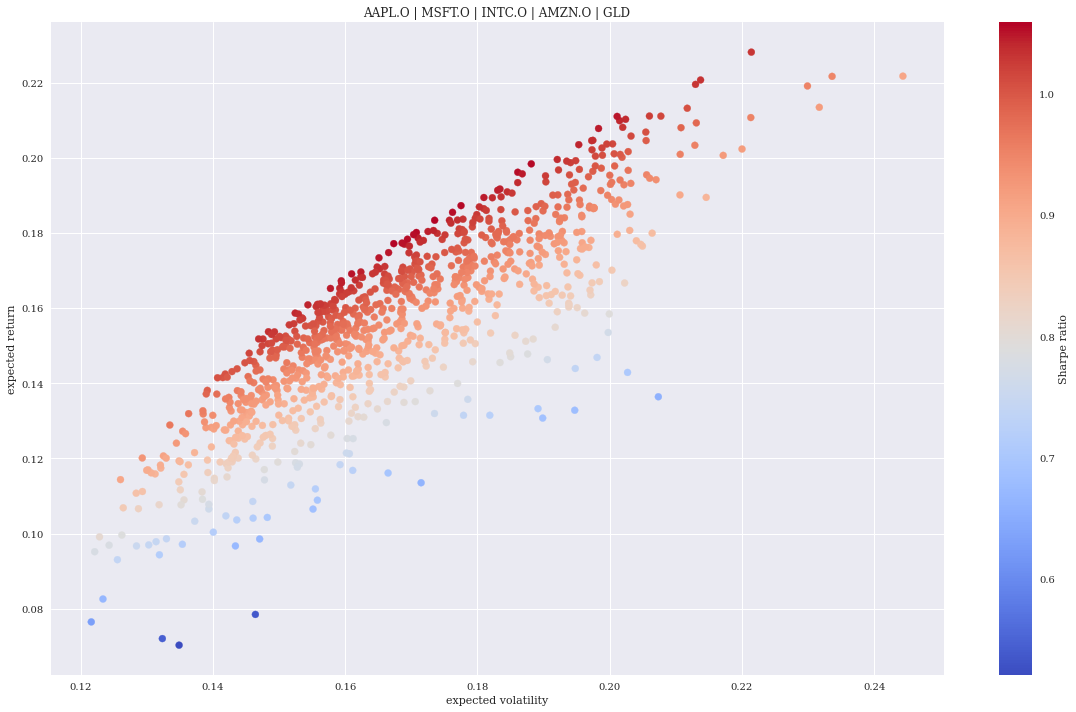

In [21]:
plt.figure(figsize=(20, 12))
fig = plt.scatter(pvr[:, 0], pvr[:, 1],
c=psr, cmap='coolwarm')
cb = plt.colorbar(fig)
cb.set_label('Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.title(' | '.join(symbols));